In [32]:
library("xlsx")
library("extRemes")
library("xts")
library("ismev")
library("RCurl")

In [3]:
data <- read.xlsx(file = "./Istanbul_StockMarket_09-11.xlsx", sheetName = 'orjinal data', startRow = 3)

In [6]:
head(data)

date,ISE,USD.BASED.ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,...,NA..1,NA..2,NA..3,NA..4,NA..5,NA..6,NA..7,NA..8,NA..9,NA..10
2009-01-05,0.035753708,0.038376187,-0.004679315,0.002193419,0.003894376,0.000000000,0.03119023,0.012698039,0.028524462,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2009-01-06,0.025425873,0.031812743,0.007786738,0.008455341,0.012865611,0.004162452,0.01891958,0.011340652,0.008772644,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2009-01-07,-0.028861730,-0.026352966,-0.030469134,-0.017833062,-0.028734593,0.017292932,-0.03589858,-0.017072795,-0.020015412,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2009-01-08,-0.062208079,-0.084715902,0.003391364,-0.011726277,-0.000465999,-0.040061309,0.02828315,-0.005560959,-0.019423778,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2009-01-09,0.009859905,0.009658112,-0.021533208,-0.019872754,-0.012709717,-0.004473502,-0.00976388,-0.010988634,-0.007802212,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2009-01-12,-0.029191028,-0.042361155,-0.022822626,-0.013525735,-0.005025533,-0.049038532,-0.05384947,-0.012451259,-0.022629745,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [7]:
time_series <- as.ts(data[c('USD.BASED.ISE')])

In [33]:
data <- read.csv(file = "./block_mm.csv")

In [4]:
head(data)

X,block_max,block_min
0,0.06170818,-0.08471590
1,0.05133066,-0.05068749
2,0.07300541,-0.04356168
3,0.06128487,-0.04329707
4,0.05033939,-0.01647775
5,0.04076084,-0.03654978


In [6]:
ts <- as.ts(data[c('block_max')])
ats <- as.numeric(as.ts(data[c('block_max')]))

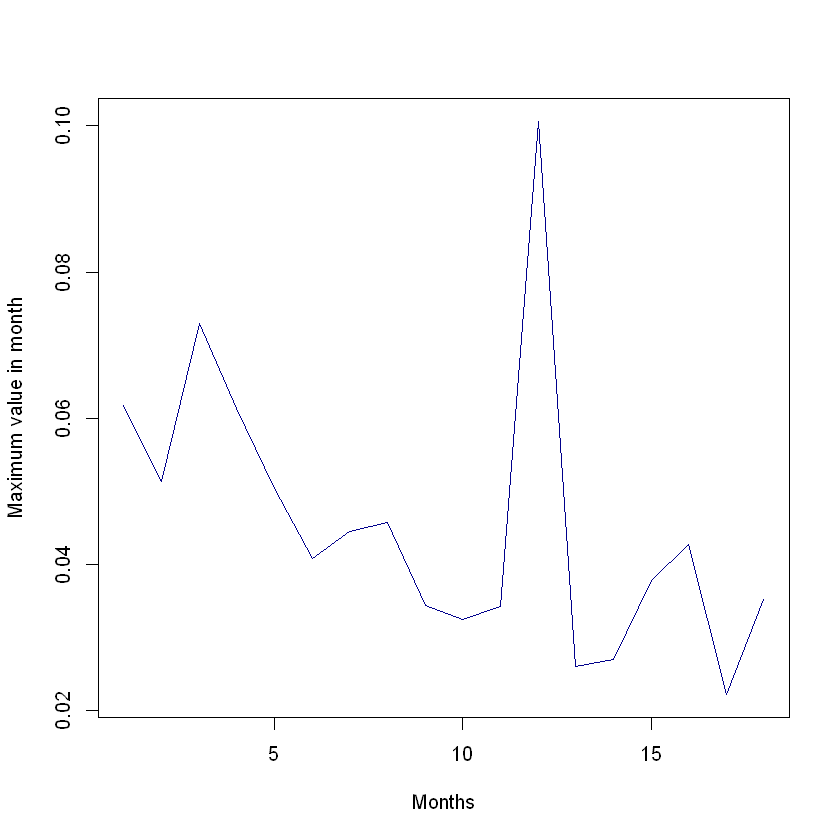

In [7]:
plot(ts, col = "darkblue", lwd = 1.5, cex.lab = 1.25, xlab = "Months", ylab = "Maximum value in month")

In [8]:
fit1 <- fevd(ats, units = "deg C")
distill(fit1)

location             scale             shape              nllh 
     3.655750e-02      1.199282e-02      1.620707e-01     -4.952362e+01 
location.location    scale.location    shape.location    location.scale 
     1.062023e-05      4.515769e-06     -2.460754e-04      4.515769e-06 
      scale.scale       shape.scale    location.shape       scale.shape 
     6.249987e-06     -9.367062e-05     -2.460754e-04     -9.367062e-05 
      shape.shape 
     4.404305e-02

fevd(x = ats, units = "deg C")
return.level.fevd.mle(x = fit1)
[1] "GEV model fitted to ats (deg C)"
Data are assumed to be  stationary 
[1] "Return Levels for period units in years"
  2-year level  20-year level 100-year level 
    0.04108619     0.08231079     0.11851704 

fevd(x = ats, units = "deg C")

[1] "Normal Approx."

                      95% lower CI   Estimate 95% upper CI
2-year return level     0.03362775 0.04108619   0.04854464
20-year return level    0.04924423 0.08231079   0.11537734
100-year return level   0.03167318 0.11851704   0.20536090


ERROR: Error in rlevd(period = return.period, loc = loc, scale = scale, shape = shape, : rlevd: invalid period argument.  Must be greater than 1.


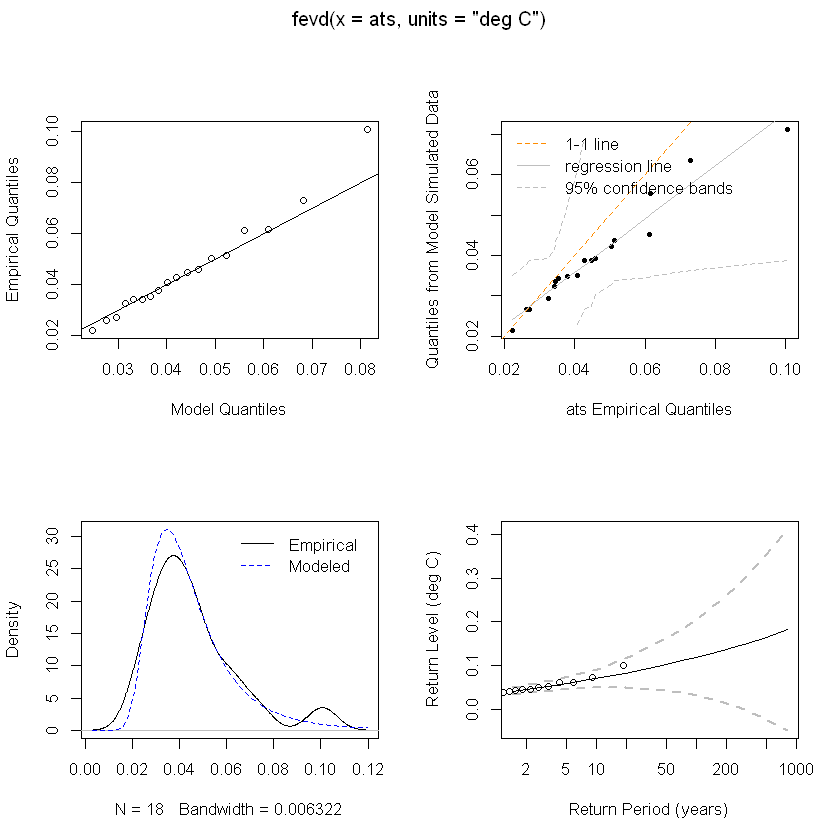

In [9]:
plot(fit1)
# plot(fit1, "trace")
return.level(fit1)
return.level(fit1, do.ci = TRUE)
ci(fit1, return.period = c(0.2, 2, 10))

In [ ]:
ci(fit1, type = "parameter")

In [ ]:
fit0 <- fevd(ts, type = "Gumbel", units = "deg C")
plot(fit0)
plot(fit0, "trace")

In [ ]:
threshrange.plot(ts, r = c(1, 15), nint = 20)
mrlplot(ts, xlim = c(0, 12))

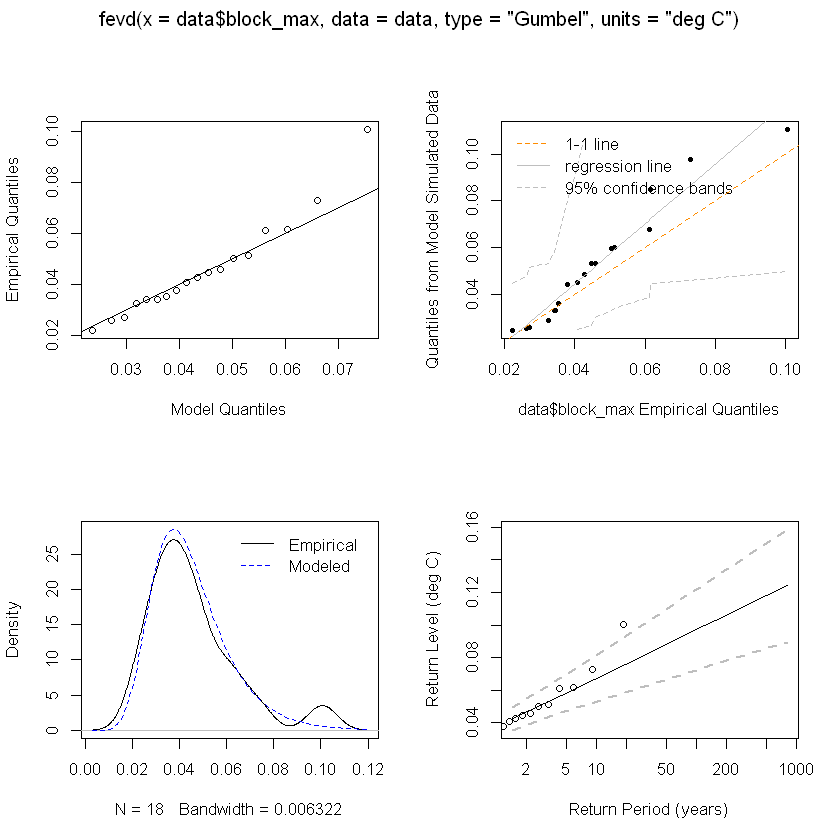

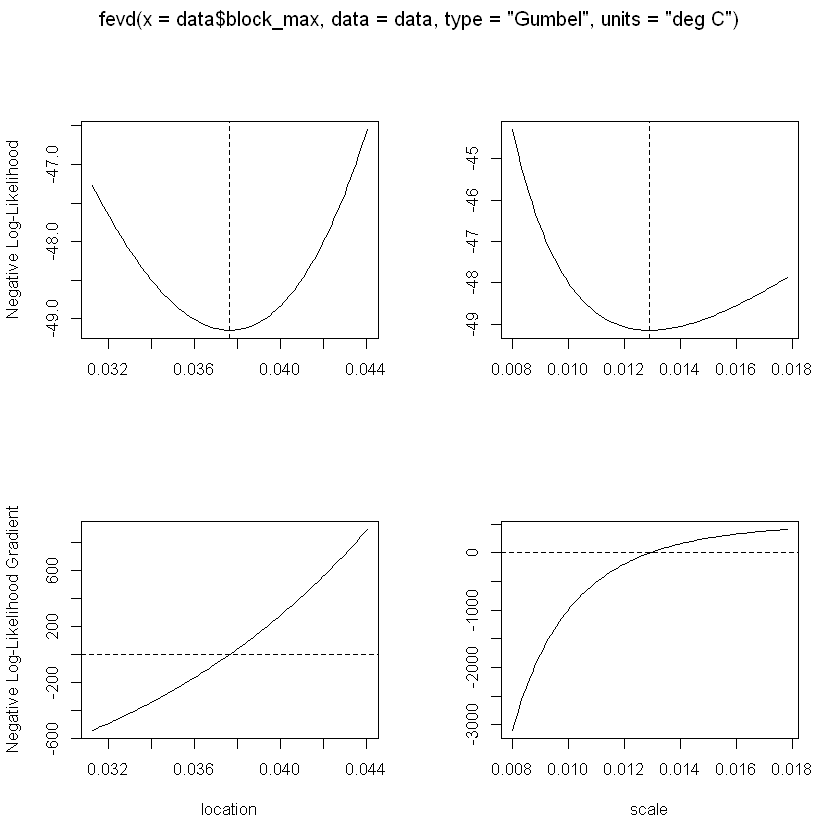

In [10]:
fit0 <- fevd(data$block_max, data, type = "Gumbel", units = "deg C")
plot(fit0)
plot(fit0, "trace")

fevd(x = data$block_max, data = data, method = "Lmoments")

[1] "Parametric Bootstrap"
502  iterations

[1] "100-year level: 0.123"

[1] "95% Confidence Interval: (0.0661, 0.2212)"


fevd(x = data$block_max, data = data, method = "Lmoments")

[1] "Parametric Bootstrap"
502  iterations

                 2.5%   Estimate      97.5%
location  0.030007960 0.03602595 0.04306998
scale     0.007629487 0.01227236 0.01917202
shape    -0.290986930 0.17435505 0.50308931


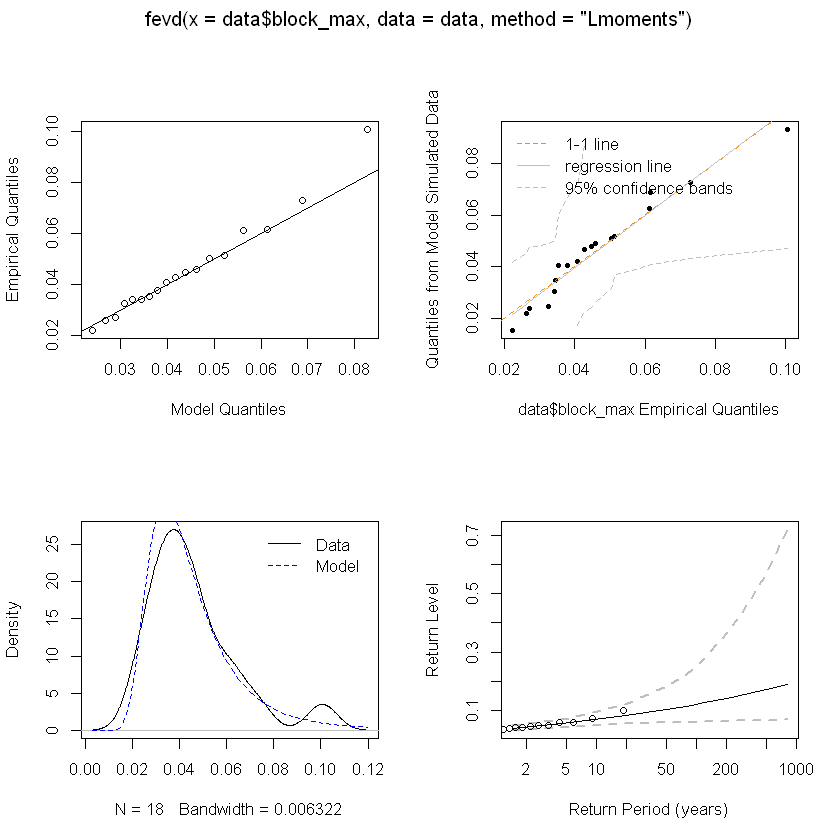

In [11]:
fitLM <- fevd(data$block_max, data, method = "Lmoments")
plot(fitLM)
ci(fitLM)
ci(fitLM, type = "parameter")

In [65]:
library("quantmod")
library("PerformanceAnalytics")

In [66]:
VaR(data$block_max, p=0.95, method = "historical")

ERROR: Error in VaR(data$block_max, p = 0.95, method = "historical"): object not of class 'arx', 'gets' nor 'isat'


In [28]:
data$block_max

[1] 0.06170818 0.05133066 0.07300541 0.06128487 0.05033939 0.04076084
 [7] 0.04457434 0.04576435 0.03437217 0.03250615 0.03428182 0.10062069
[13] 0.02605659 0.02704045 0.03779504 0.04267029 0.02218826 0.03525682

In [31]:
ES(data$block_min, p=0.95)

ES,-0.08249416


In [55]:
x <- seq(0.9, 0.999, by=0.001)
curve <- list()
i <- 1
for (p in x){
    curve[[i]] <- VaR(data$block_min, p=p, weights = NULL, portfolio_method = "single", method = "gaussian")
    i <- i + 1
}

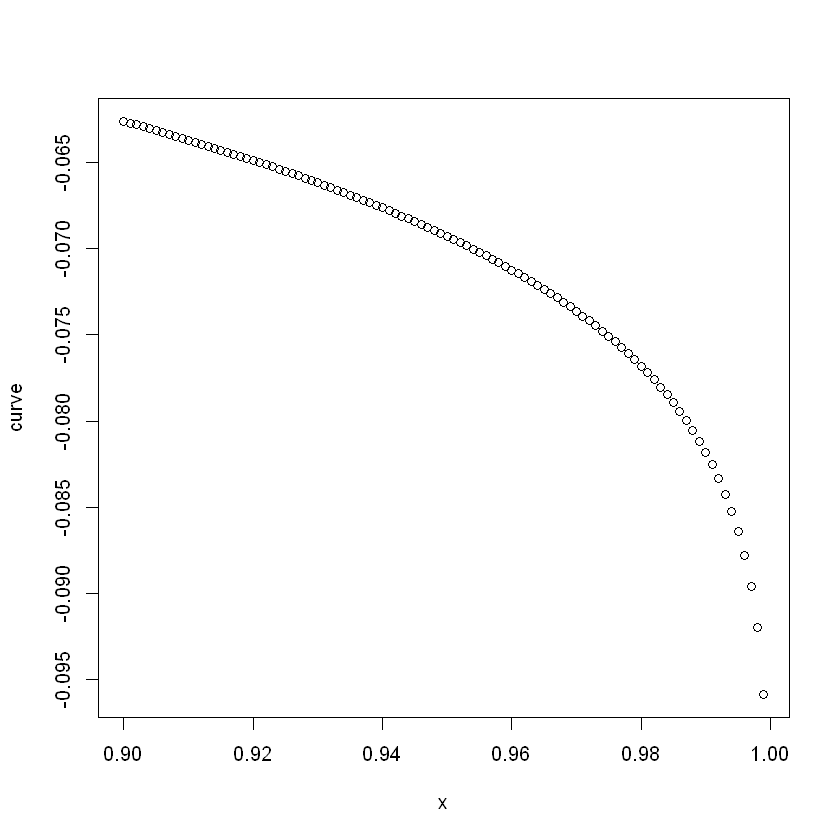

In [56]:
plot(x, curve)

In [63]:
# obtain a GEV with mean, 4, scale 1.5 and shape of -0.1
mu <- 4 # location parameter
sigma <- 1.5 # scale parameter
xi <- -0.1 # shape parameter

params <- c( mu, sigma, xi)

# generate a sample of size 25
gen1 <- gen.gev( p=params, n=25)

# Now generate one with a trend.
gen2 <- gen.gev( p=params, n=25, trend=0.1)

# Fit 'gen1' to a GEV distribution and plot the diagnostics.
gen1.fit <- gev.fit( gen1)
class( gen1.fit) <- "gev.fit"
plot( gen1.fit)

# Fit 'gen2' to a GEV distribution and plot the diagnostics.
gen2.fit1 <- gev.fit( gen2)
class( gen2.fit1) <- "gev.fit"
plot( gen2.fit1)

ERROR: Error in gen.gev(p = params, n = 25): could not find function "gen.gev"


In [15]:
library("gets")

In [19]:
mymodel <- arx(data$block_min, arch=1)
res <- VaR(mymodel, level=c(0.99, 0.95, 0.9))

In [20]:
res

      VaR0.99    VaR0.95     VaR0.9
1          NA         NA         NA
2  0.05933925 0.05274744 0.04745738
3  0.06418951 0.05705890 0.05133645
4  0.06569448 0.05839669 0.05254007
5  0.06575574 0.05845114 0.05258906
6  0.07622786 0.06775995 0.06096429
7  0.06748205 0.05998568 0.05396970
8  0.06762394 0.06011181 0.05408318
9  0.06795842 0.06040913 0.05435068
10 0.07050216 0.06267030 0.05638508
11 0.06360221 0.05653684 0.05086675
12 0.07488769 0.06656865 0.05989246
13 0.06021635 0.05352710 0.04815886
14 0.07012097 0.06233146 0.05608022
15 0.07123479 0.06332154 0.05697101
16 0.07979123 0.07092747 0.06381414
17 0.06588719 0.05856799 0.05269419
18 0.06891693 0.06126117 0.05511727

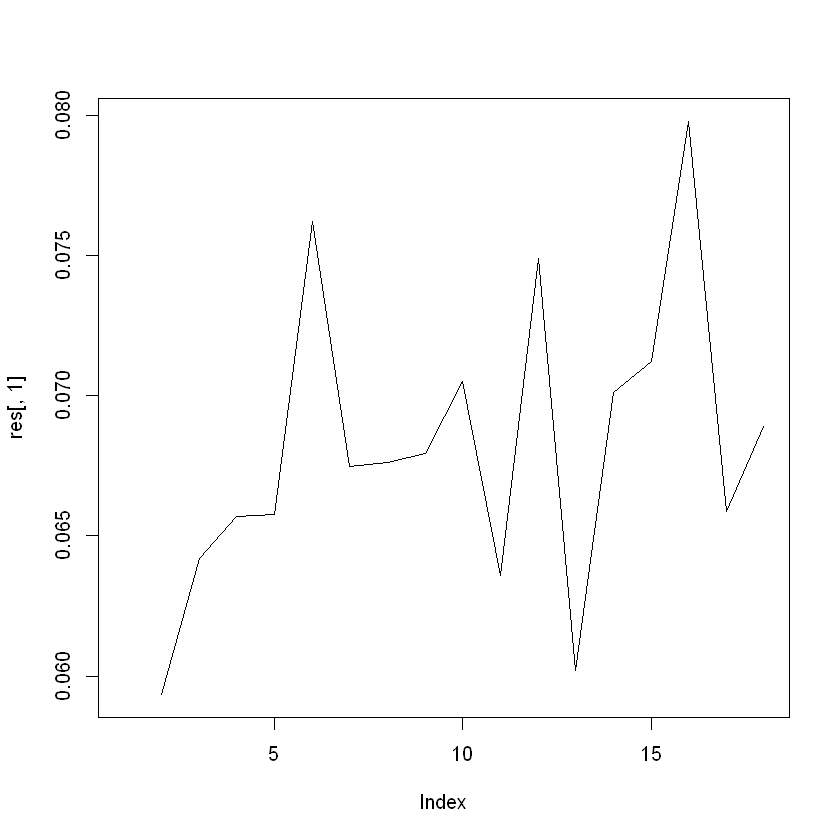

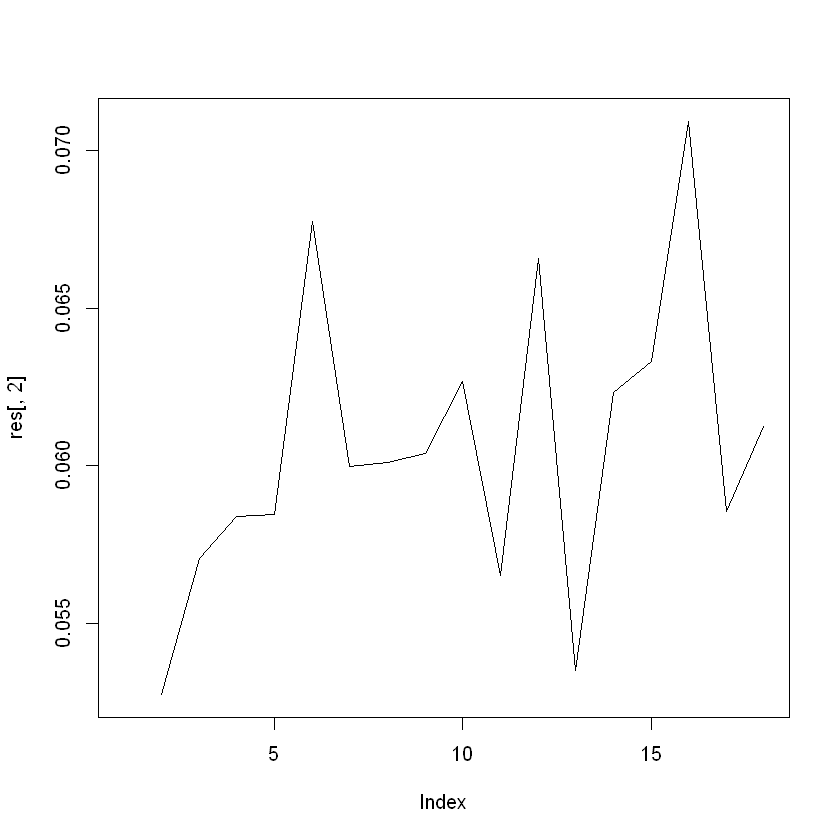

In [39]:
plot(res[,1]) # res[2:18,3]
plot(res[,2]) # res[2:18,3]